***Logistic regression*** is the most fundamental algorithm for handling binary
classification problems
- It's a commonly used algorithm for constructing a baseline model, and is generally a
good first model to build, because it's highly interpretable
-Logistic regression is similar to linear regression
	"We're still dealing with the line equation for making predictions, but 	this time the result is passed through the sigmoid function to turn ouptut 	into the probability"

FileNotFoundError: [Errno 2] No such file or directory: 'images/003_LogisticRegression_sigmoid_function.png'

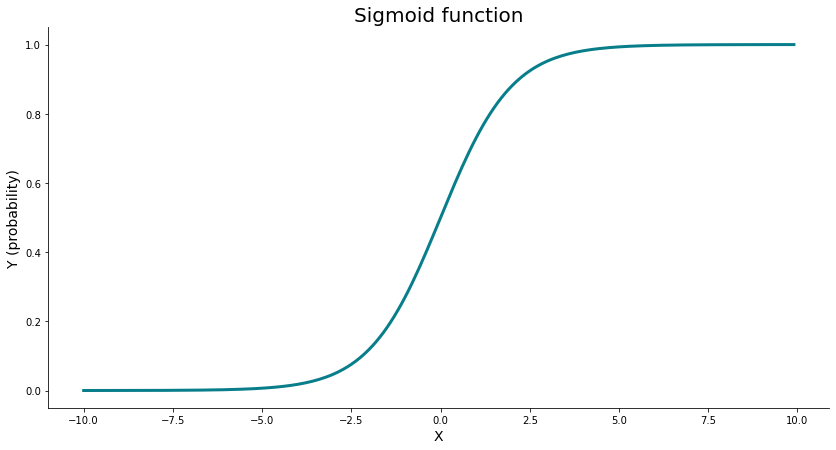

In [1]:
# Import Libraries and visualize the function to see what happens behind the scenes

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-10, 10, 0.1)
ys = [sigmoid(x) for x in xs]

plt.plot(xs, ys, c='#087E8B', lw=3)
plt.title('Sigmoid function', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y (probability)', size=14)
plt.savefig('images/003_LogisticRegression_sigmoid_function.png', dpi=300, bbox_inches='tight')
plt.show()

# Binary Cross Entropy

Binary cross entropy function is a common cost function for evaluating binary
classification machine learning algorithms

***Calculating BCE for a correct prediction***

***Calculating BCE for an incorrect prediction***

In [2]:
def binary_cross_entropy(y, y_hat):
    def safe_log(x): return 0 if x == 0 else np.log(x)

    total = 0

    for curr_y, curr_y_hat in zip(y, y_hat):
        total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
    return - total / len(y)

In [3]:
# We need the safe_log() function inside because log(0) returns infinity

np.log(0)

<ipython-input-3-b5102111a2ac>:3: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [4]:
# Let's evalutate for Example 1

binary_cross_entropy(y=[1, 0], y_hat=[0.9, 0.1])

0.10536051565782628

In [5]:
# Let's evalutate for Example 2

binary_cross_entropy(y=[1, 0], y_hat=[0.1, 0.9])

2.302585092994046

***Implementation***

In [6]:
#The _binary_cross_entropy() private function is used to calculate loss at every iteration:

class LogisticRegression:
    '''
    A class which implements logistic regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        
    @staticmethod
    def _sigmoid(x):
        '''
        Private method, used to pass results of the line equation through the sigmoid function.
        
        :param x: float, prediction made by the line equation
        :return: float
        '''
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def _binary_cross_entropy(y, y_hat):
        '''
        Private method, used to calculate binary cross entropy value between actual classes
        and predicted probabilities.
        
        :param y: array, true class labels
        :param y_hat: array, predicted probabilities
        :return: float
        '''

        def safe_log(x):
            return 0 if x == 0 else np.log(x)
        total = 0
        for curr_y, curr_y_hat in zip(y, y_hat):
            total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
        return - total / len(y)

    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the logistic regression model.

        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize coefficients
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            probability = self._sigmoid(linear_pred)

        # Calculate derivatives
        partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (probability - y)))
        partial_d = (1 / X.shape[0]) * (2 * np.sum(probability - y))

        # Update the coefficients
        self.weights -= self.learning_rate * partial_w
        self.bias -= self.learning_rate * partial_d

    def predict_proba(self, X):
        '''
        Calculates prediction probabilities for a given threshold using the line equation
        passed through the sigmoid function.

        :param X: array, features
        :return: array, prediction probabilities
        '''
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        '''
        Makes predictions using the line equation passed through the sigmoid function.

        :param X: array, features
        :param threshold: float, classification threshold
        :return: array, predictions
        '''
        probabilities = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in probabilities]

***Testing***
We'll use the breast cancer dataset from Scikit-Learn

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [8]:
#The below code cell applies train/test split to the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#initialize and train the model, and afterwards make predictions

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

<ipython-input-6-cf8dedc14bbf>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [10]:
#the "optimal" weights

model.weights

array([ 1.17934945e-01,  3.21931868e-01,  6.44404396e-01, -6.99182418e+00,
        1.95780440e-03, -3.26679121e-04, -2.95543385e-03, -1.61730527e-03,
        3.73312088e-03,  1.62370330e-03, -4.42615385e-03,  3.10949231e-02,
       -3.23104835e-02, -1.32728769e+00,  1.96870110e-04,  2.02314945e-04,
        1.73633165e-04,  7.48191209e-05,  5.25307692e-04,  8.70139121e-05,
        6.14707692e-02,  3.82936264e-01,  2.57274725e-01, -1.70610769e+01,
        2.42332747e-03, -2.31281319e-03, -6.07675407e-03, -2.03859538e-03,
        4.78582418e-03,  1.61735165e-03])

In [11]:
#the "optimal" bias

model.bias

0.025714285714285714

In [12]:
#evaluate the model with two metrics - accuracy score and the confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
accuracy_score(y_test, preds)

0.37719298245614036

In [14]:
print(confusion_matrix(y_test, preds))

[[43  0]
 [71  0]]


***Threshold Optimization***

In [15]:
evals = []

for thresh in np.arange(0, 1.01, 0.01):
    preds = model.predict(X_test, threshold=thresh)
    acc = accuracy_score(y_test, preds)
    evals.append({'Threshold': thresh, 'Accuracy': acc})

<ipython-input-6-cf8dedc14bbf>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


FileNotFoundError: [Errno 2] No such file or directory: 'images/003_LogisticRegression_threshold_optimization.png'

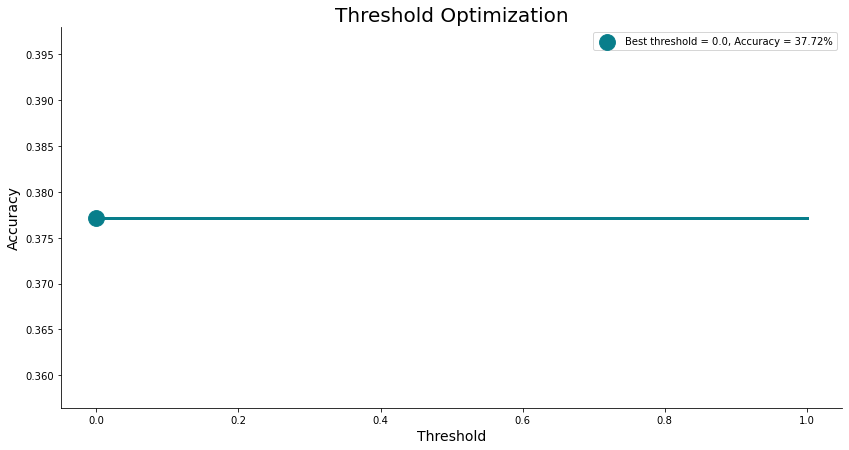

In [16]:
import pandas as pd
evals_df = pd.DataFrame(evals)

best_thresh = evals_df.sort_values(by='Accuracy', ascending=False).iloc[0]

plt.plot(evals_df['Threshold'], evals_df['Accuracy'], lw=3, c='#087E8B')
plt.scatter(best_thresh['Threshold'], best_thresh['Accuracy'], label=f"Best threshold = {best_thresh['Threshold']}, Accuracy = {(best_thresh['Accuracy'] * 100):.2f}%", s=250, c='#087E8B')
plt.title('Threshold Optimization', size=20)
plt.xlabel('Threshold', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.savefig('images/003_LogisticRegression_threshold_optimization.png', dpi=300,
bbox_inches='tight')
plt.show()

In [17]:
#retrain with the best threshold

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test, threshold=0)

<ipython-input-6-cf8dedc14bbf>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [18]:
#evaluate again for accuracy and confusion matrix

accuracy_score(y_test, preds)

0.37719298245614036

In [19]:
print(confusion_matrix(y_test, preds))

[[43  0]
 [71  0]]


***Comparison with Scikit-Learn***

In [24]:
#We want to know if our model is good, so let's compare it with LogisticRegression model from Scikit-Learn

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
n_iter_i = _check_optimize_result(

SyntaxError: invalid syntax (<ipython-input-24-eeb2cd7958af>, line 10)

In [21]:
accuracy_score(y_test, lr_preds)

NameError: name 'lr_preds' is not defined

In [ ]:
print(confusion_matrix(y_test, lr_preds))